In [1]:
%load_ext watermark
%watermark -a "Alessandro Parisi" -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn
# to install watermark launch 'pip install watermark' at command line

Alessandro Parisi 
last updated: 2019-02-18 

CPython 3.5.4
IPython 6.1.0

numpy 1.16.1
pandas 0.20.3
matplotlib 2.0.2
sklearn 0.20.0
seaborn 0.8.0


In [2]:
# Execute plot() inline without calling show()
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../datasets/sms_spam_perceptron.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)



In [4]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = p.predict(X_test)

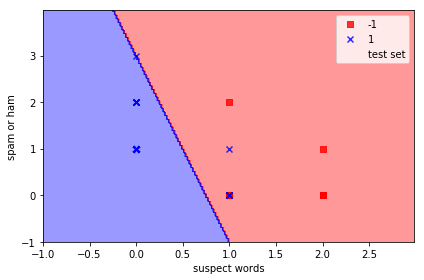

In [6]:
# Thanks to Sebastian Raschka for 'plot_decision_regions'
# https://github.com/rasbt/python-machine-learning-book
from defs import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=p, test_idx=range(-5, 5))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 3
Accuracy: 0.90
